### Kütüphanelerin Yüklenmesi ve Görüntüleme Ayarları

Veri analizi ve görselleştirme işlemleri için temel kütüphaneler projeye dahil edilmiştir:

- `pandas`: Veri okuma, düzenleme ve analiz işlemleri için kullanılır.
- `numpy`: Sayısal hesaplamalar ve diziler üzerinde işlem yapmaya yarar.
- `seaborn`: İstatistiksel görselleştirme araçları sunar, özellikle veri dağılımlarını ve ilişkileri görselleştirmek için tercih edilir.
- `matplotlib.pyplot`: Grafik çizimi için en temel kütüphanelerden biridir.

Kod bloğu içinde ayrıca aşağıdaki yapılandırma yapılmıştır:

- `pd.set_option('display.max_columns', None)`: Pandas çıktılarında tüm sütunların eksiksiz görüntülenmesini sağlar. Bu ayar, özellikle sütun sayısının fazla olduğu veri setlerinde veri keşfi (EDA) sırasında büyük kolaylık sağlar.

İsteğe bağlı olarak, yorum satırı halindeki `warnings.filterwarnings('ignore')` satırı aktif edilerek çalışma sırasında oluşabilecek uyarı mesajları bastırılabilir.

In [1]:
# Temel kütüphaneler
import os
import glob
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Uyarıları devre dışı bırakmak istersen açabilirsin:
# import warnings
# warnings.filterwarnings('ignore')

# Tüm sütunları göster
pd.set_option('display.max_columns', None)

# Grafik stilini ayarlayalım (isteğe bağlı)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Veri Dosyasının Yüklenmesi ve Temizlenmesi

`../data/raw/` klasöründeki `HB_Details_*.csv` formatındaki dosyalar taranarak en son oluşturulan dosya otomatik olarak yüklenmiştir. Bu işlem sayesinde her çalıştırmada manuel olarak dosya adı belirtmeye gerek kalmaz.

Veri seti `hb_df` olarak yüklendikten sonra `df` değişkenine kopyalanmış ve analizlerde kullanılmak üzere düzenlenmiştir. Veri setinden analizde ihtiyaç duyulmayan `Başlık`, `Çekilme Zamanı` ve `Link` sütunları çıkarılmıştır.

Kod sonunda `df.shape` komutu ile veri setindeki satır ve sütun sayısı görüntülenmiştir.

In [2]:
# Klasördeki tüm Hepsiburada detay dosyalarını bul
file_list = glob.glob('../data/raw/HB_Details_*.csv')

# En son tarihli dosyayı seç
latest_file = max(file_list, key=os.path.getctime)

# Dosyayı oku
hb_df = pd.read_csv(latest_file)
df = hb_df.copy()

# Gereksiz sütunları sil
df.drop(['Başlık', 'Çekilme Zamanı', 'Link'], axis=1, inplace=True)

# Veri boyutunu göster
df.shape

(1793, 24)

In [3]:
df.sample(3)

,Marka,Kullanım Amacı,Renk,Cihaz Ağırlığı,İşlemci Tipi,İşlemci,İşlemci Nesli,İşlemci Çekirdek Sayısı,Maksimum İşlemci Hızı,Ram (Sistem Belleği),Ram Tipi,Ekran Kartı,Ekran Kartı Tipi,Ekran Kartı Hafızası,Ekran Kartı Bellek Tipi,SSD Kapasitesi,Harddisk Kapasitesi,Ekran Boyutu,Max Ekran Çözünürlüğü,Ekran Özelliği,Ekran Yenileme Hızı,Ekran Panel Tipi,İşletim Sistemi,Fiyat (TRY)
1158,Lenovo,Ofis ve İş,Gri,2 kg ve Altı,AMD Ryzen 5,7535HS,Ryzen,NaN,"4,55 GHz",NaN,DDR5,AMD Radeon 660M,Dahili Ekran Kartı,Paylaşımlı,Onboard,NaN,Yok,16 inç,1920 x 1200,WUXGA,60 Hz,IPS,Windows 11 Pro,"76.929,78 TL"
1724,Lenovo,Ofis ve İş,Metalik Gri,1 - 2 kg,Intel Core i7,13700H,13.Nesil,NaN,5 GHz,NaN,DDR5,Intel Iris Xe Graphics,Dahili Ekran Kartı,Paylaşımlı,Onboard,NaN,Yok,14 inç,1920 x 1200,WUXGA,NaN,IPS,Windows 11 Pro,"77.223,50 TL"
1271,Apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.100 TL


### Eksik Veri Analizi

Bu bölümde veri setindeki eksik veriler analiz edilmiştir. Her bir sütun için eksik değerlerin oranı yüzde (%) cinsinden hesaplanmıştır. Sadece eksik değeri bulunan sütunlar filtrelenmiş ve eksik oranlarına göre azalan şekilde sıralanmıştır.

Bu analiz, sonraki veri temizleme ve ön işleme adımlarında hangi sütunların doldurulması, çıkarılması ya da dikkate alınması gerektiğine karar vermede yardımcı olur.

In [4]:
# Eksik veri yüzdeleri
missing_percent = df.isnull().mean() * 100

# Sadece eksik verisi olanları filtrele
missing_percent = missing_percent[missing_percent > 0]

# Büyükten küçüğe sırala ve yazdır
print(missing_percent.sort_values(ascending=False))

İşlemci Çekirdek Sayısı    79.252649
Ram (Sistem Belleği)       67.707752
SSD Kapasitesi             67.540435
Ekran Yenileme Hızı        41.327384
Kullanım Amacı             35.805912
Ekran Özelliği             24.149470
İşlemci Tipi                4.294479
Cihaz Ağırlığı              4.127161
Ram Tipi                    3.736754
Ekran Kartı Bellek Tipi     3.290574
Renk                        3.179030
Maksimum İşlemci Hızı       2.900167
Ekran Panel Tipi            2.844395
Harddisk Kapasitesi         2.788622
Ekran Kartı Tipi            2.677078
İşlemci                     2.621305
İşlemci Nesli               2.621305
Ekran Kartı                 2.509760
İşletim Sistemi             2.119353
Max Ekran Çözünürlüğü       2.119353
Ekran Boyutu                2.119353
Ekran Kartı Hafızası        1.952036
Marka                       0.055772
dtype: float64


### Kategorik (Object) Değişkenlerin Değer Dağılımı

Bu bölümde, veri setindeki `object` (kategorik) veri tipine sahip sütunların içerisindeki benzersiz değerler ve bu değerlerin frekansları incelenmiştir. Her bir kategorik sütun için `value_counts()` fonksiyonu kullanılarak değerlerin kaç kez tekrarlandığı listelenmiştir.

Bu analiz sayesinde:
- Sütunlarda hangi kategorilerin baskın olduğu,
- Beklenmeyen ya da tutarsız (örneğin "Siyah, Siyah" gibi tekrar eden) değerlerin olup olmadığı,
- Aykırı veya düşük frekanslı sınıfların tespiti

gibi bilgiler elde edilir. Bu bulgular, özellikle veri temizliği, etiket birleştirme ve model öncesi dönüşümler için yol gösterici olacaktır.

In [5]:
# Object sutunlarindaki degerleri ve sayilarini varsa aykiri degerleri gozlemleyelim 
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('****'*10)

Marka
Lenovo        700
Asus          283
HP            169
Dell          149
Casper        126
MSI           104
Acer           76
Apple          72
Monster        69
Game Garaj     26
Erazer          7
Huawei          6
Hometech        1
Chuwi           1
I-Life          1
Xiaomi          1
Gigabyte        1
Name: count, dtype: int64
****************************************
Kullanım Amacı
Ofis ve İş                    666
Oyun ve Eğlence               426
Ev Kullanıcıları - Öğrenci     58
Ev                              1
Name: count, dtype: int64
****************************************
Renk
Gri                 411
Siyah               392
Siyah, Siyah        166
Gri, Gri            153
Metalik Gri          99
                   ... 
Gri, Siyah            1
Beyaz, Mavi           1
Gümüş - Gri, Gri      1
Mavi, Gri             1
Gümüş, Silver         1
Name: count, Length: 71, dtype: int64
****************************************
Cihaz Ağırlığı
2 kg ve Altı     740
2 - 4 kg         54

### Sayısal Değerlere Dönüştürülebilecek Sütunların Dönüştürülmesi

Bu bölümde, `object` veri tipinde olup gerçekte sayısal değer içeren sütunlar temizlenerek `float` formatına dönüştürülmüştür. Bu işlem, sayısal analiz ve görselleştirmelerin doğru şekilde yapılabilmesi için gereklidir.

Dönüştürülen sütunlar:

- **Fiyat (TRY)**: "30.999,00 TL" gibi metinsel değerler, nokta ve virgül ayıklanarak float formata çevrilmiştir.
- **Maksimum İşlemci Hızı**: "4,5 GHz" gibi metinler içinden yalnızca sayı kısmı alınarak ondalıklı sayıya dönüştürülmüştür.
- **Ram (Sistem Belleği)**: "16 GB" gibi ifadelerden sadece sayısal değer alınmıştır.
- **Ekran Kartı Hafızası**: "6 GB", "8 GB" gibi değerler sayı olarak alınmış, "Paylaşımlı" gibi metinler NaN olmuştur.
- **SSD Kapasitesi**: "512 GB", "1 TB" gibi değerler temizlenerek float'a çevrilmiştir.
- **Ekran Boyutu**: "15,6 inç" gibi ifadeler temizlenip ondalık formata getirilmiştir.
- **Ekran Yenileme Hızı**: "144 Hz" gibi değerler içinden sayısal kısım alınmıştır.
- **İşlemci Çekirdek Sayısı**: Metinsel olarak tutulan çekirdek sayıları sayısal tipe dönüştürülmüştür.

Bu adım sonucunda, bu sütunlar artık sayısal işlemler, görselleştirmeler ve modellemeler için doğrudan kullanılabilir hale gelmiştir.

In [6]:
# Fiyat (TRY) kolonunu float yapalim
df['Fiyat (TRY)'] = (
    df['Fiyat (TRY)']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.replace(' TL', '', regex=False)
    .astype(float)
)
# Maksimum İşlemci Hızı kolonunu float yapalim
df['Maksimum İşlemci Hızı'] = (
    df['Maksimum İşlemci Hızı']
    .str.extract(r'(\d+,\d+|\d+\.?\d*)')[0]
    .str.replace(',', '.', regex=False)
    .astype(float)
)
#Ram Sistem Belleği kolonunu float yapalim
df['Ram (Sistem Belleği)'] = (
    df['Ram (Sistem Belleği)']
    .str.extract(r'(\d+)')
    .astype(float)
)
#Ekran Kartı Hafızası kolonunu float yapalim
df['Ekran Kartı Hafızası'] = (
    df['Ekran Kartı Hafızası']
    .str.extract(r'(\d+)')
    .astype(float)
)
#SSD Kapasitesi kolonunu float yapalim
df['SSD Kapasitesi'] = (
    df['SSD Kapasitesi']
    .str.extract(r'(\d+)')
    .astype(float)
)
#ekran Boyutu kolonunu float yapalim
df['Ekran Boyutu'] = (
    df['Ekran Boyutu']
    .str.replace(',', '.', regex=False)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)
#Ekran Yenileme Hızı kolonunu float yapalim
df['Ekran Yenileme Hızı'] = (
    df['Ekran Yenileme Hızı']
    .str.extract(r'(\d+)')
    .astype(float)
)
#İşlemci Çekirdek Sayısı kolonunu float yapalim
df['İşlemci Çekirdek Sayısı'] = (
    df['İşlemci Çekirdek Sayısı']
    .str.extract(r'(\d+)')
    .astype(float)
)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
İşlemci Çekirdek Sayısı,368.0,10.956522,4.214709,2.00,8.0,10.0,14.0,24.0
Maksimum İşlemci Hızı,1682.0,4.626576,0.723543,1.05,4.5,4.6,4.9,11.0
Ram (Sistem Belleği),579.0,21.062176,13.020995,1.00,16.0,16.0,32.0,64.0
Ekran Kartı Hafızası,621.0,7.267311,2.804842,1.00,6.0,8.0,8.0,24.0
SSD Kapasitesi,579.0,277.892919,247.680888,1.00,1.0,512.0,512.0,512.0
Ekran Boyutu,1755.0,15.599259,0.996639,7.00,15.6,15.6,16.0,18.0
Ekran Yenileme Hızı,1052.0,114.926806,57.096338,60.00,60.0,120.0,144.0,300.0
Fiyat (TRY),1793.0,52364.165449,31894.321656,6729.00,31699.0,44599.0,62599.0,272820.4


### Sayısal Sütunlardaki Aykırı Değerlerin Görselleştirilmesi

Bu bölümde, veri setindeki sayısal değişkenler için `boxplot` grafiklerinden yararlanılarak aykırı (outlier) değerler incelenmiştir. Her bir sayısal sütun için ayrı ayrı kutu grafiği çizilmiştir.

**Boxplot (Kutu Grafiği):**

- Ortadaki çizgi medyan değeri gösterir.
- Kutu (box) alt ve üst çeyrek değerlerini (Q1, Q3) temsil eder.
- Kutu dışındaki noktalar (uçlarda yer alanlar) genellikle aykırı değer olarak kabul edilir.

Bu analiz, özellikle regresyon gibi modellerde aykırı değerlerin etkisini azaltmak veya filtrelemek için faydalıdır. Aykırı değerler tespit edildikten sonra veri ön işleme aşamasında uygun bir şekilde ele alınabilir (örneğin silme, sınırlandırma, dönüştürme vb.).

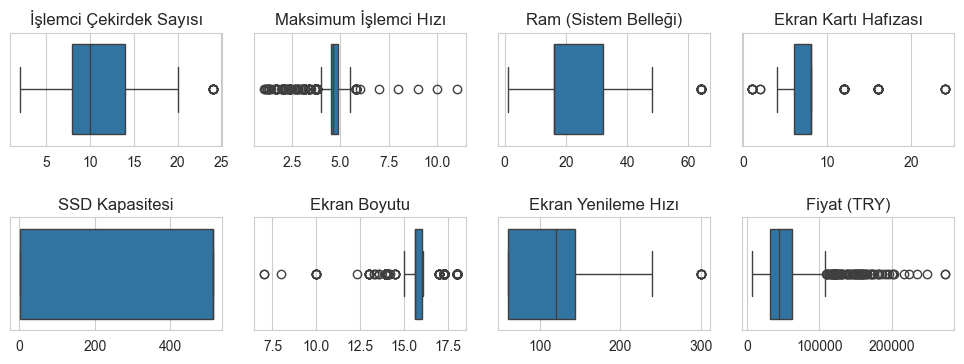

In [7]:
#Sayisal kolonlardaki aykiri degerleri gozlemleyelim
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Grid boyutu
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Grafik alanını oluştur
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2 * n_rows))
axes = axes.flatten()  # Kolay erişim için düzleştir

# Her sütun için boxplot çiz
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")  

# Boş kalan subplotları kaldır
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### Veri Görselleştirme: Fiyat, Marka, Donanım ve Ekran Özellikleri

Bu bölümde, ürünlerin fiyatları ile bazı önemli özellikleri arasındaki ilişkiler çeşitli grafikler ile incelenmiştir. Görselleştirmeler, kategorik değişkenler ile sayısal değişkenler arasındaki dağılımı daha net bir şekilde analiz etmeyi amaçlamaktadır.

**Kullanılan grafikler ve açıklamaları:**

- `Boxplot (Marka vs Fiyat)`  
  Her bir markanın fiyat aralıklarını ve aykırı değerlerini görselleştirir. Marka bazlı fiyat dağılımının genel eğilimleri anlaşılır.

- `Barplot (Ekran Kartı Tipi vs Ortalama Fiyat)`  
  Ekran kartı tiplerine göre ortalama fiyatları karşılaştırır. Harici ekran kartı barındıran modellerin fiyat farkları ortaya konur.

- `Boxplot (Ekran Özelliği vs Fiyat)`  
  Ekran çözünürlük/kalite sınıflarına göre fiyat dağılımını görselleştirir. Örneğin OLED veya QHD ekranların daha yüksek fiyat aralığına sahip olup olmadığı incelenebilir.

- `Histogram (RAM)`  
  RAM kapasitesinin dağılımını gösterir. Hangi RAM değerlerinin veri setinde daha yaygın olduğu tespit edilir.

Bu görseller sayesinde, donanım özellikleri ile fiyat ilişkisi daha somut bir biçimde analiz edilebilir.

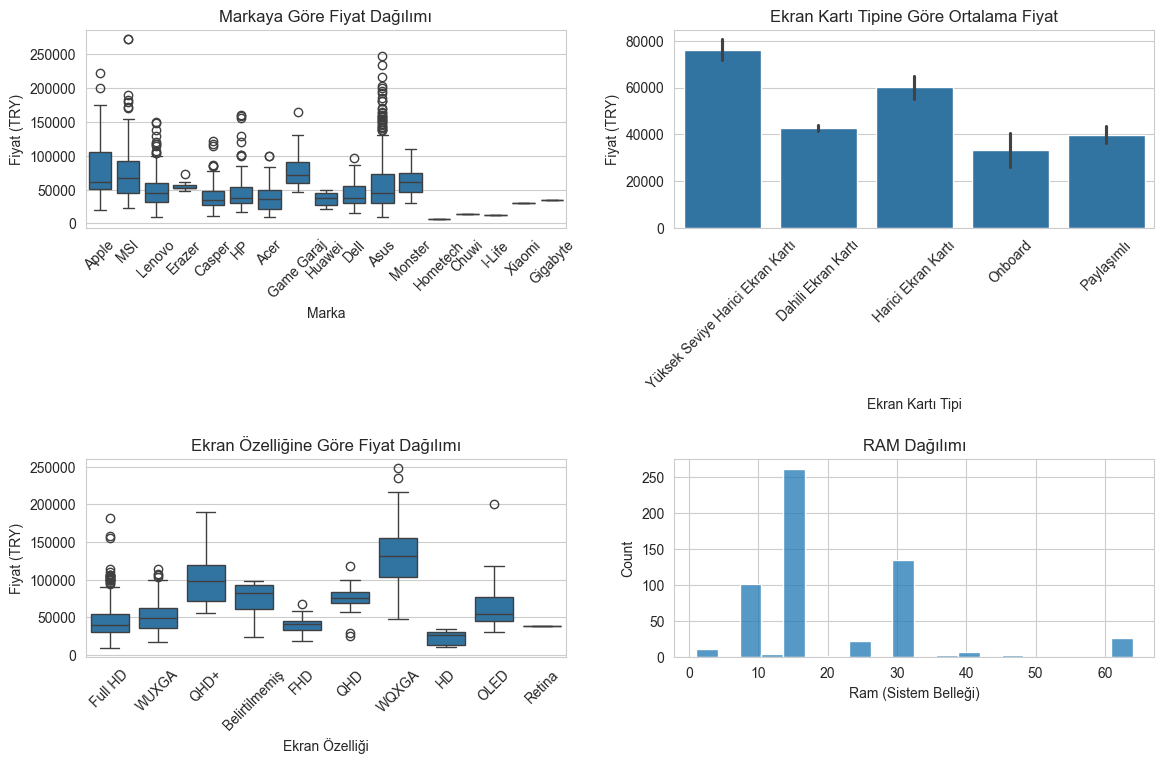

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 satır, 2 sütun

# 1. Grafik - Boxplot (Marka vs Fiyat)
sns.boxplot(data=df, x='Marka', y='Fiyat (TRY)', ax=axes[0, 0])
axes[0, 0].set_title('Markaya Göre Fiyat Dağılımı')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Grafik - Barplot (Ekran Kartı Tipi vs Fiyat)
sns.barplot(data=df, x='Ekran Kartı Tipi', y='Fiyat (TRY)', ax=axes[0, 1])
axes[0, 1].set_title('Ekran Kartı Tipine Göre Ortalama Fiyat')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Grafik - Boxplot (Ekran Özelliği vs Fiyat)
sns.boxplot(data=df, x='Ekran Özelliği', y='Fiyat (TRY)', ax=axes[1, 0])
axes[1, 0].set_title('Ekran Özelliğine Göre Fiyat Dağılımı')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Grafik - Histogram (RAM Dağılımı)
sns.histplot(data=df, x='Ram (Sistem Belleği)', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('RAM Dağılımı')

plt.tight_layout(pad=2.0)
plt.show()

### Sayısal Değişkenler ile Fiyat Arasındaki İlişkinin İncelenmesi

Bu bölümde, çeşitli sayısal donanım özellikleri ile `Fiyat (TRY)` değişkeni arasındaki ilişkiler `scatterplot` (dağılım grafiği) kullanılarak görselleştirilmiştir.

İncelenen değişkenler:

- İşlemci Çekirdek Sayısı  
- Maksimum İşlemci Hızı (GHz)  
- RAM (GB)  
- Ekran Kartı Hafızası (GB)  
- SSD Kapasitesi (GB)  
- Ekran Boyutu (inç)  
- Ekran Yenileme Hızı (Hz)  

**Scatterplot (Dağılım Grafiği):**

- X ekseninde donanım özelliği, Y ekseninde fiyat yer alır.
- Her bir nokta bir ürünü temsil eder.
- Noktaların yoğunluğu, saçılım yönü ve kümelenmeleri değişkenler arası ilişkinin gücü hakkında fikir verir.

Bu görselleştirmeler sayesinde, örneğin RAM miktarı arttıkça fiyat da artıyor mu, daha yüksek ekran yenileme hızları fiyatı etkiliyor mu gibi sorulara görsel olarak yanıt aranmaktadır.

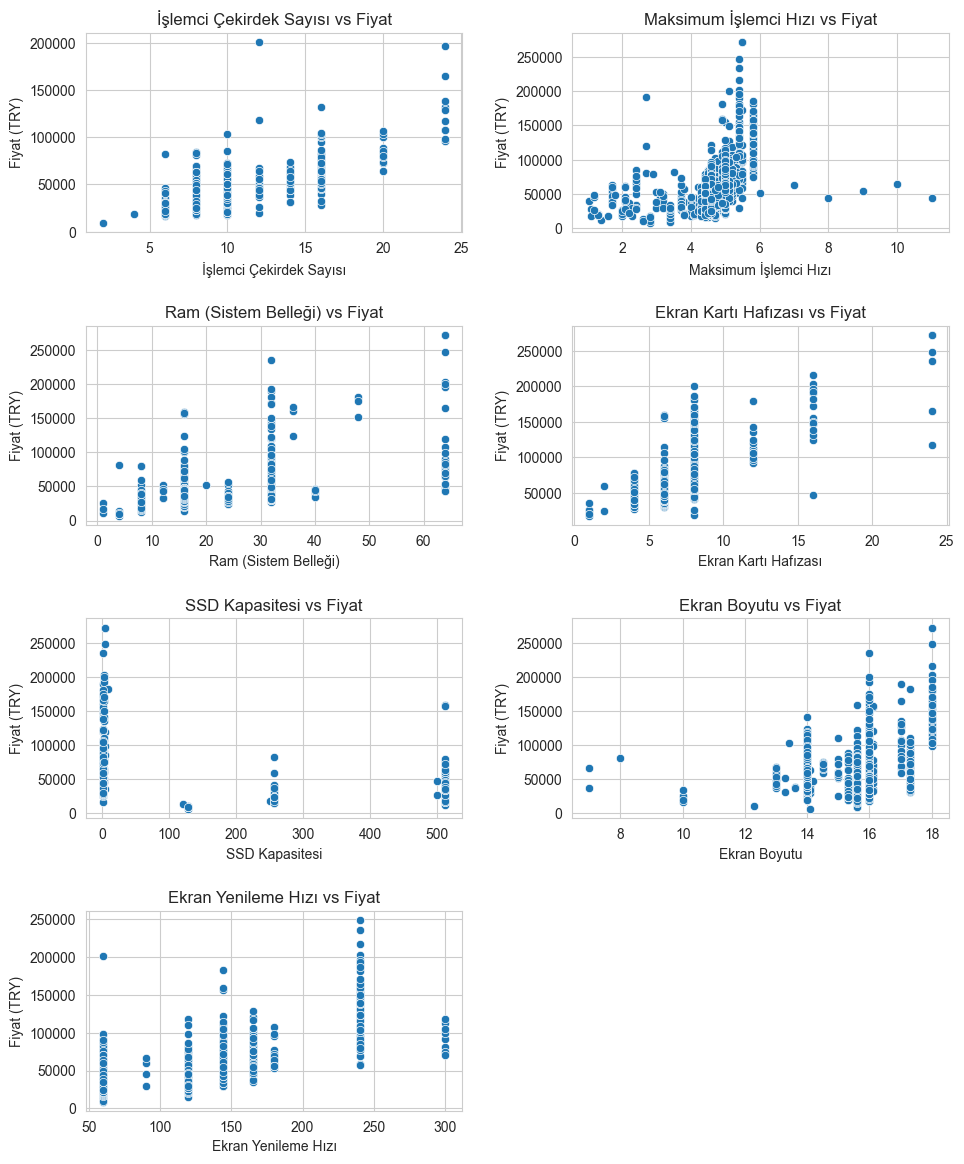

In [9]:
#numerical kolonlar ile Fiyat (TRY) arasindaki iliskiyi gozlemleyelim
# İncelenecek sayısal sütunlar
features = ['İşlemci Çekirdek Sayısı', 'Maksimum İşlemci Hızı',
            'Ram (Sistem Belleği)', 'Ekran Kartı Hafızası',
            'SSD Kapasitesi', 'Ekran Boyutu',
            'Ekran Yenileme Hızı']

n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  # Satır sayısı hesaplanıyor

# Grid yapısı oluşturuluyor
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3* n_rows))
axes = axes.flatten()  # Kolay indeksleme için düzleştirme

# Her scatterplot için döngü
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Fiyat (TRY)', ax=axes[i])
    axes[i].set_title(f'{feature} vs Fiyat')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fiyat (TRY)')

# Boş kalan subplot'lar varsa sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### Sayısal Değişkenler Arasındaki Korelasyonun İncelenmesi

Bu bölümde, veri setindeki tüm sayısal sütunlar arasındaki ilişkiler `corr()` fonksiyonu kullanılarak hesaplanmış ve sonuçlar bir korelasyon matrisi şeklinde `heatmap` (ısı haritası) ile görselleştirilmiştir.

**Korelasyon (Correlation):**

- +1: Pozitif yönlü güçlü ilişki  
- -1: Negatif yönlü güçlü ilişki  
- 0: İlişki yok  

Isı haritasında `annot=True` parametresi sayesinde her hücrede ilgili korelasyon katsayısı sayısal olarak gösterilmiştir. Görselleştirme, özellikle **Fiyat (TRY)** değişkeni ile diğer sayısal değişkenler (örneğin RAM, SSD, işlemci hızı) arasındaki ilişkiyi incelemek için kullanılır.

Bu analiz, hangi değişkenlerin fiyatla daha güçlü ilişki içinde olduğunu belirleyerek modelleme sürecinde hangi özelliklerin daha açıklayıcı olduğunu saptamaya yardımcı olur.

<Axes: >

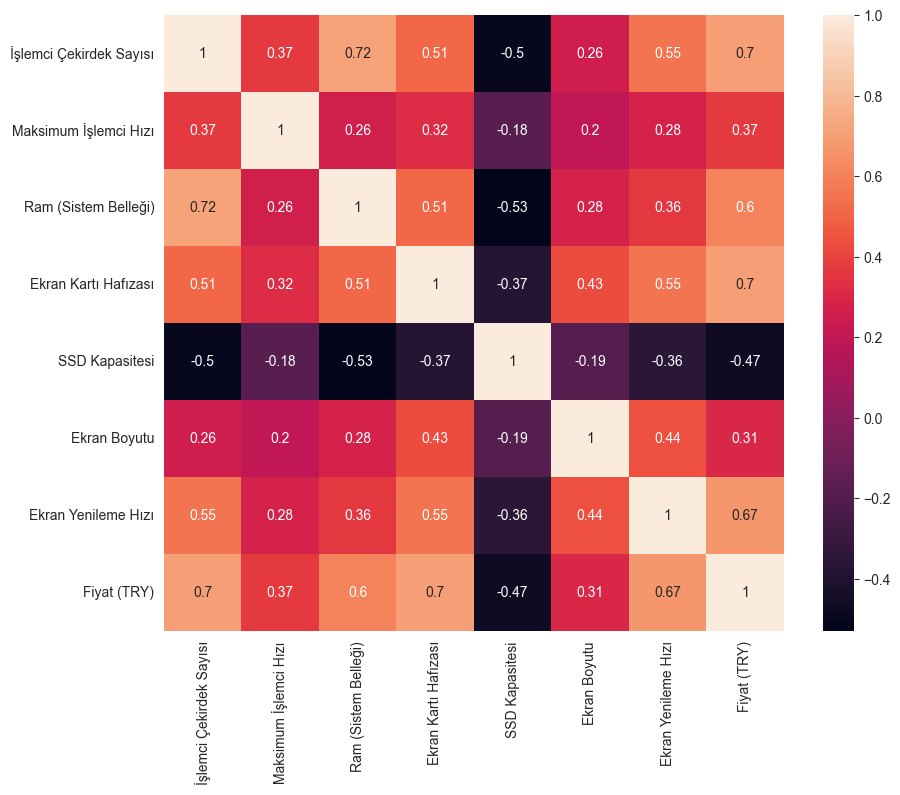

In [10]:
#numerical kolonlar arasindaki iliskiyi gozlemleyelim ve fiyat ile iliskili olanlari belirleyelim
df_corr = df.select_dtypes(include='number').corr() 
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot = True)

### Fiyat Dağılımının İncelenmesi ve Log Dönüşümü

Bu bölümde, `Fiyat (TRY)` değişkeninin dağılımı iki farklı şekilde görselleştirilmiştir:

1. **Orijinal Dağılım (Linear)**  
   `sns.displot()` fonksiyonu ile ürün fiyatlarının ham (log alınmamış) hali görselleştirilmiştir. Fiyat dağılımı genellikle sağa çarpık olup, bazı ürünler aşırı yüksek fiyatlara sahip olabilir.

2. **Log Dönüşümü Sonrası Dağılım**  
   `np.log()` ile logaritmik dönüşüm uygulanarak fiyatların daha normal (simetrik) bir dağılıma sahip olup olmadığı gözlemlenmiştir. Bu dönüşüm, özellikle aykırı değerlerin etkisini azaltmak ve modelleme aşamasında daha dengeli sonuçlar elde etmek için faydalıdır.

Bu analiz sonucunda, fiyat değişkeninin yapısı ve modellemeye uygunluğu hakkında önemli bilgiler elde edilir.

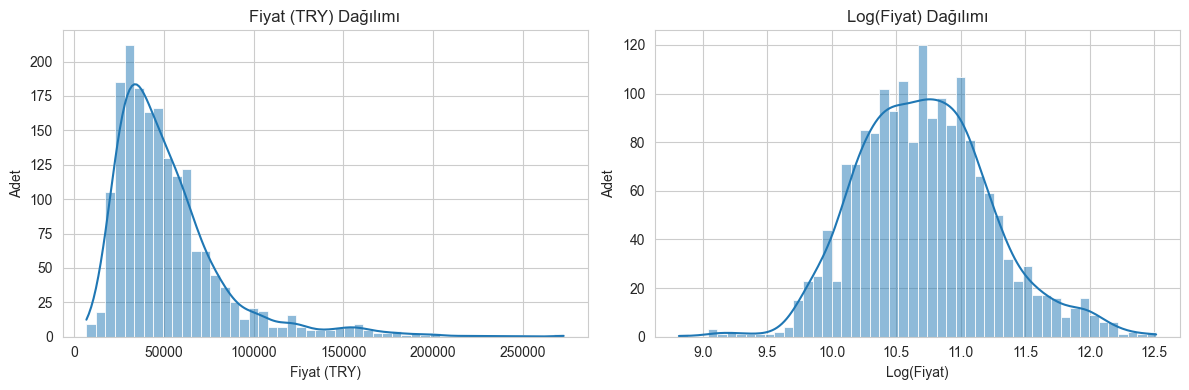

In [11]:
# NaN ve sıfır değerleri filtrele (log için gerekli)
log_prices = df['Fiyat (TRY)'][df['Fiyat (TRY)'] > 0].dropna()

# Grid yapı: 1 satır, 2 sütun
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Orijinal fiyat dağılımı
sns.histplot(df['Fiyat (TRY)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Fiyat (TRY) Dağılımı')
axes[0].set_xlabel('Fiyat (TRY)')
axes[0].set_ylabel('Adet')

# Log dönüşümlü fiyat dağılımı
sns.histplot(np.log(log_prices), bins=50, kde=True, ax=axes[1])
axes[1].set_title('Log(Fiyat) Dağılımı')
axes[1].set_xlabel('Log(Fiyat)')
axes[1].set_ylabel('Adet')

plt.tight_layout()
plt.show()